In [1]:
import os
from collections import defaultdict
import math
import numpy as np 
import re
import torch
import torch.nn as nn
from itertools import cycle
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from torch.optim.lr_scheduler import MultiStepLR
from tqdm.auto import tqdm

# Used to get the data
from sklearn.metrics import ndcg_score

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
nltk.download('stopwords')

import matplotlib.pyplot as plt 
import matplotlib
# matplotlib.use('Agg')


import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/chrisliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
result = {}
for dist in ['mean', 'IDF', 'uniform', 'gaussian', 'exponential', 'pmi']:
    x = pd.read_csv('records/dataset-CNN-n_document-500-wdist-{}-filtertopk-100/result.csv'.format(dist))
    x['distribution'] = dist
    result[dist] = x

In [47]:
tmp = pd.concat([result[k] for k in result])
tmp = tmp[tmp['model']!='topk']

In [48]:
t = 'ndcg@50'
m = 'sk-linear-regression'

result2 = {}
for dist, r in result.items():
    result2[dist] = r[t]

In [49]:
result2 = pd.DataFrame(result2)
result2.index = result['mean']['model']
result2

,mean,IDF,uniform,gaussian,exponential,pmi
model,,,,,,
topk,0.045730,0.045730,0.045730,0.04573,0.045730,0.045730
sk-linear-regression,0.441990,0.468269,0.474616,0.43843,0.519512,0.552309
sk-lasso,0.544538,0.566316,0.623829,0.54223,0.720013,0.871262
our-lasso,0.595637,0.618987,0.669990,0.59123,0.754911,0.885066


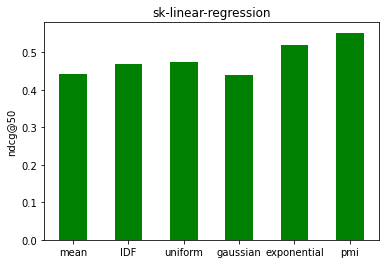

In [50]:
plt.bar(result2.columns,
            result2.loc[m], 
            width=0.5, 
            bottom=None, 
            align='center',
            color='green')
plt.title('{}'.format(m))
plt.ylabel(t)
plt.savefig('{} {}.png'.format(m, t))
# plt.savefig(os.path.join(experiment_dir, '{}.png'.format(feat)))
plt.show()

In [52]:
tmp

,F1@10,F1@30,F1@50,ndcg@10,ndcg@30,ndcg@50,ndcg@all,model,distribution
1,0.166529,0.191039,0.187557,0.510728,0.447135,0.441990,0.647908,sk-linear-regression,mean
2,0.256176,0.277396,0.255557,0.624598,0.552444,0.544538,0.682790,sk-lasso,mean
3,0.277087,0.300711,0.271551,0.700567,0.612160,0.595637,0.753025,our-lasso,mean
1,0.164887,0.181237,0.174086,0.535528,0.472038,0.468269,0.656852,sk-linear-regression,IDF
2,0.266103,0.280780,0.253027,0.637081,0.571743,0.566316,0.694305,sk-lasso,IDF
3,0.289951,0.299329,0.270336,0.716594,0.628906,0.618987,0.762785,our-lasso,IDF
1,0.159914,0.175617,0.169344,0.524056,0.470545,0.474616,0.654397,sk-linear-regression,uniform
2,0.291410,0.296475,0.261703,0.692927,0.626592,0.623829,0.733783,sk-lasso,uniform
3,0.313546,0.314929,0.277731,0.757753,0.673887,0.669990,0.794857,our-lasso,uniform
1,0.167165,0.191719,0.188783,0.499613,0.440156,0.438430,0.641092,sk-linear-regression,gaussian


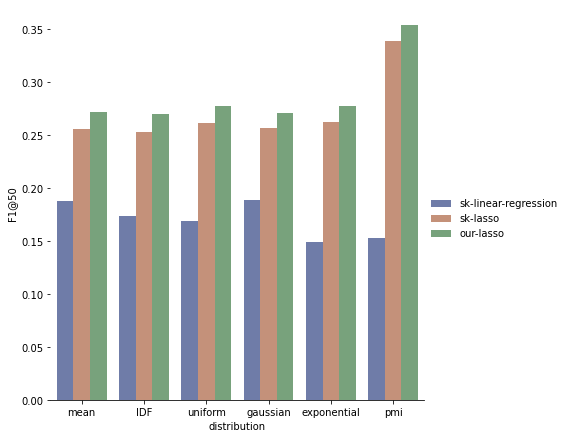

In [54]:
import seaborn as sns
g = sns.catplot(
    data=tmp, kind="bar",
    x="distribution", y="F1@50", hue="model",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")